In [1]:
import os
import sys
#sys.path.append('/home/cjw/Code/DeepLearning')

import tensorflow as tf
import numpy as np
import pandas as pd

from autoencoder import autoencoder_train
from autoencoder import network
from autoencoder import utils

/home/cjw/anaconda3/envs/deep/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#datadir = "/v/Data/cyto/ChannelOne/"
datadir = "/media/cjw/Data/cyto/mmCompensatedTifs"

mmfiles = utils.list_mmfiles(datadir)
print(mmfiles)

mmdict = dict()

n_all_images = 0
for mmfilename in mmfiles:
#mmfilename = datadir + "Fish6_15_cjw_mean_zero.mm"
#mmfilename = datadir + "mmplate15-1.mm"
    mmheader = np.memmap(mmfilename, dtype="int32", mode='r',
                    shape=(4,))

    header_shape = mmheader.shape
    print(header_shape, mmheader)
    xshape = [mmheader[0], mmheader[1], mmheader[2], mmheader[3]]
    xshape = tuple(xshape)
    del mmheader
    n_all_images += xshape[0]
    
    m3 = np.memmap(mmfilename, dtype='float32', offset=128,
              mode='r', shape=xshape)
    key = mmfilename.split("/")[-1]
    mmdict[key] = m3

print(n_all_images)
mmdict.keys()

['/media/cjw/Data/cyto/mmCompensatedTifs/Fish3_CCB.mm', '/media/cjw/Data/cyto/mmCompensatedTifs/Fish4_ICE.mm', '/media/cjw/Data/cyto/mmCompensatedTifs/Fish3_Untreated.mm', '/media/cjw/Data/cyto/mmCompensatedTifs/Fish6_Untreated.mm', '/media/cjw/Data/cyto/mmCompensatedTifs/Fish2_Untreated.mm', '/media/cjw/Data/cyto/mmCompensatedTifs/Fish1_Ice.mm', '/media/cjw/Data/cyto/mmCompensatedTifs/Fish5_Untreated.mm', '/media/cjw/Data/cyto/mmCompensatedTifs/Fish6_ICE.mm', '/media/cjw/Data/cyto/mmCompensatedTifs/Fish4_CCB.mm', '/media/cjw/Data/cyto/mmCompensatedTifs/Fish6_CCB.mm', '/media/cjw/Data/cyto/mmCompensatedTifs/Fish2_CCB.mm', '/media/cjw/Data/cyto/mmCompensatedTifs/Fish1_Untreated.mm', '/media/cjw/Data/cyto/mmCompensatedTifs/Fish4_Untreated.mm', '/media/cjw/Data/cyto/mmCompensatedTifs/Fish2_ICE.mm', '/media/cjw/Data/cyto/mmCompensatedTifs/Fish5_CCB.mm', '/media/cjw/Data/cyto/mmCompensatedTifs/Fish3_ICE.mm', '/media/cjw/Data/cyto/mmCompensatedTifs/Fish1_CCB.mm', '/media/cjw/Data/cyto/mmComp

dict_keys(['Fish3_CCB.mm', 'Fish4_ICE.mm', 'Fish3_Untreated.mm', 'Fish6_Untreated.mm', 'Fish2_Untreated.mm', 'Fish1_Ice.mm', 'Fish5_Untreated.mm', 'Fish6_ICE.mm', 'Fish4_CCB.mm', 'Fish6_CCB.mm', 'Fish2_CCB.mm', 'Fish1_Untreated.mm', 'Fish4_Untreated.mm', 'Fish2_ICE.mm', 'Fish5_CCB.mm', 'Fish3_ICE.mm', 'Fish1_CCB.mm', 'Fish5_ICE.mm'])

In [3]:
n = xshape[0]
all_ids =  range(n_all_images)
idx = 0
dataframes = list()
for key in mmdict.keys():
    mm = mmdict[key]
    n = mm.shape[0]
    print(n)
    file = n*[key[0:-3]]
    fid = range(n)
    mmfile = n*[key]
    plate = n*[0]
    row = n*[0]
    column = n*[0]
    field = n*[0]
    yc = n*[32]
    xc = n*[32]
    well = n*[0]
    ids = all_ids[idx:idx + n]
    idx += n
    df = pd.DataFrame({'id':ids, 'fid':fid, 'file':file, 'mmfile':mmfile, 'plate':plate,
                     'row':row, 'column':column, 'field':field,
                      'yc':yc, 'xc':xc, 'well':well})

    dataframes.append(df)
    
p_df = pd.concat(dataframes, ignore_index=True)

10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000


Encoder True
Tensor("Placeholder:0", shape=(?, 32, 32, 4), dtype=float32) (?, 32, 32, 4)
isize:  4 32
dh0 (?, 32, 32, 4)
180000 1406 128
Epoch:  0 Iteration:  0 Loss:  607.49054 607.49054 0.0


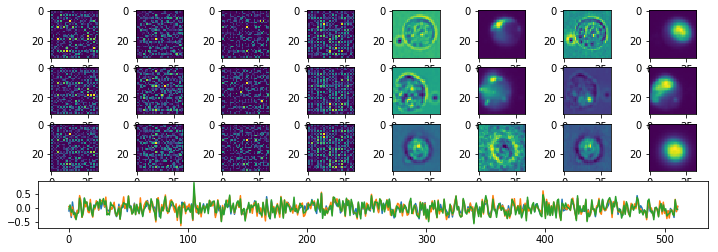

Epoch:  0 Iteration:  500 Loss:  13.309385 13.309385 0.0


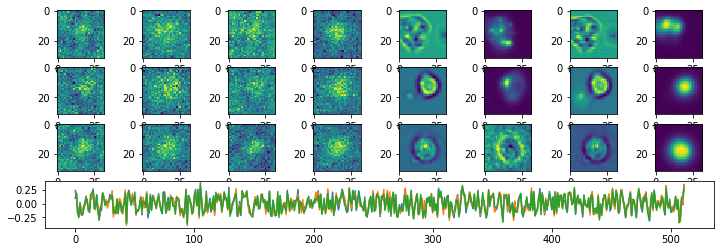

Epoch:  0 Iteration:  1000 Loss:  9.534689 9.534689 0.0


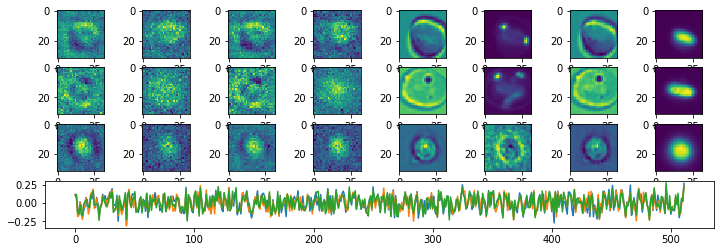

Epoch:  1 Iteration:  0 Loss:  7.7969837 7.7969837 0.0


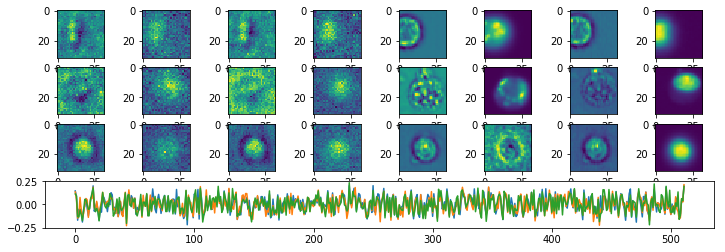

Epoch:  1 Iteration:  500 Loss:  6.267509 6.267509 0.0


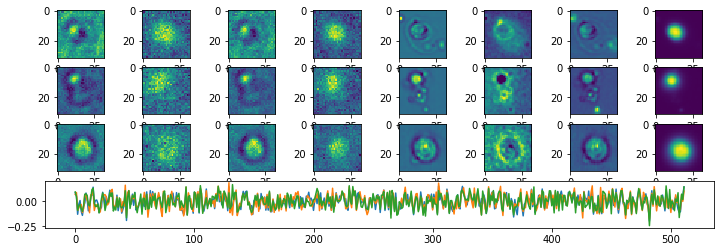

Epoch:  1 Iteration:  1000 Loss:  5.605 5.605 0.0


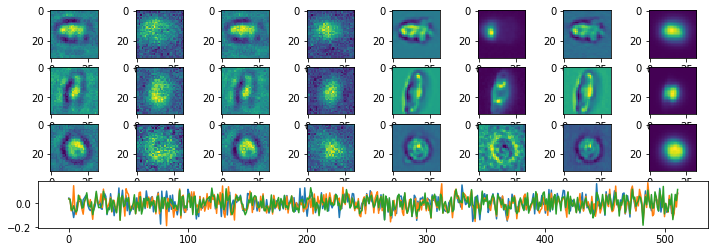

Epoch:  2 Iteration:  0 Loss:  5.0400844 5.0400844 0.0


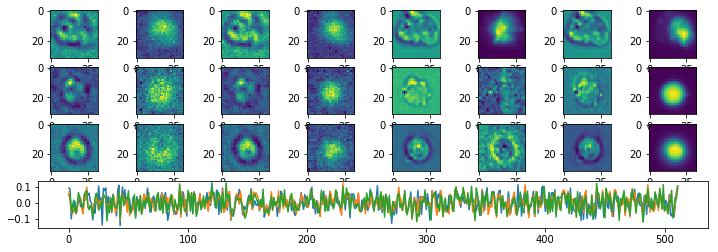

Epoch:  2 Iteration:  500 Loss:  4.3437376 4.3437376 0.0


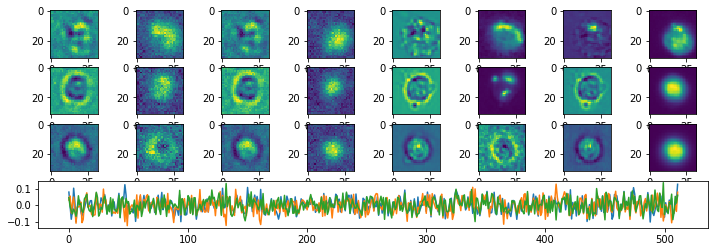

Epoch:  2 Iteration:  1000 Loss:  3.8716435 3.8716435 0.0


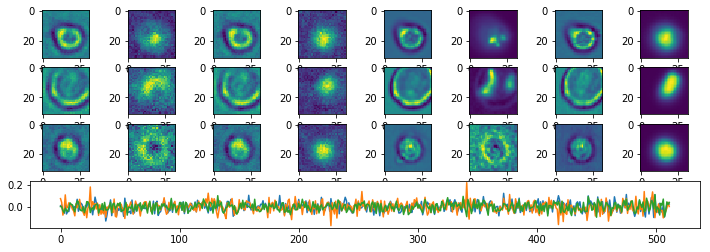

Epoch:  3 Iteration:  0 Loss:  3.5302584 3.5302584 0.0


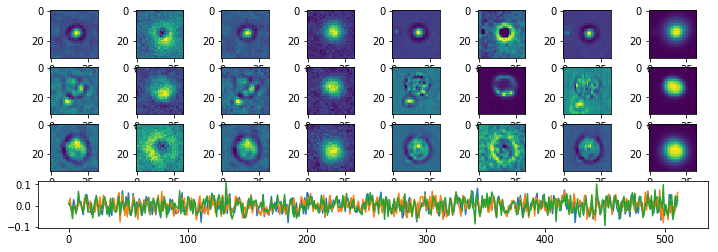

Epoch:  3 Iteration:  500 Loss:  3.3013182 3.3013182 0.0


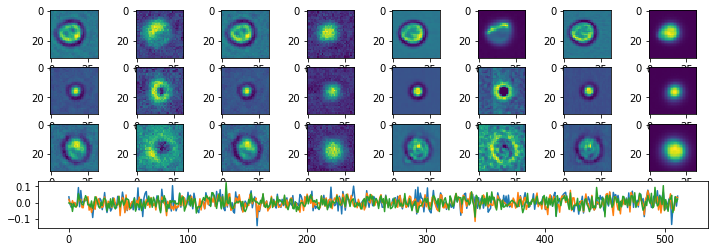

Epoch:  3 Iteration:  1000 Loss:  3.0794349 3.0794349 0.0


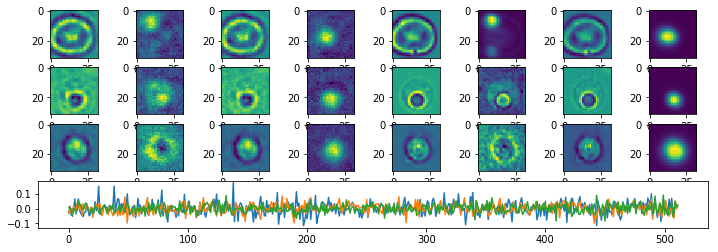

Epoch:  4 Iteration:  0 Loss:  2.7925196 2.7925196 0.0


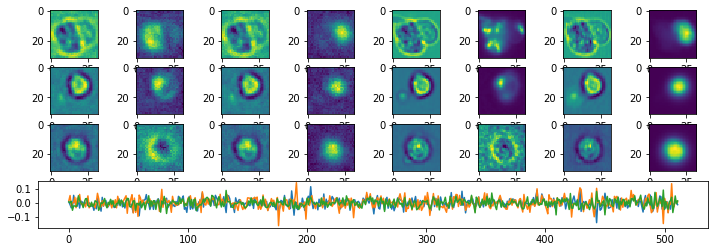

Epoch:  4 Iteration:  500 Loss:  2.767751 2.767751 0.0


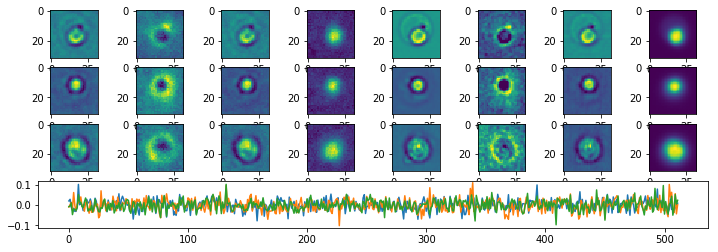

Epoch:  4 Iteration:  1000 Loss:  2.6364434 2.6364434 0.0


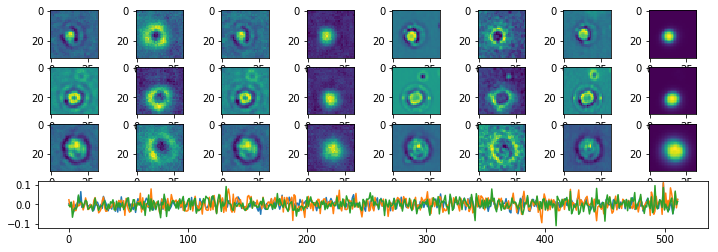

Epoch:  5 Iteration:  0 Loss:  2.3257563 2.3257563 0.0


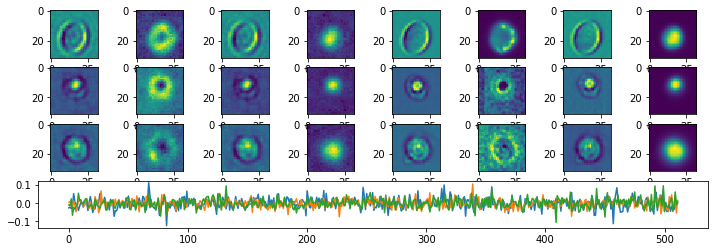

Epoch:  5 Iteration:  500 Loss:  2.3105319 2.3105319 0.0


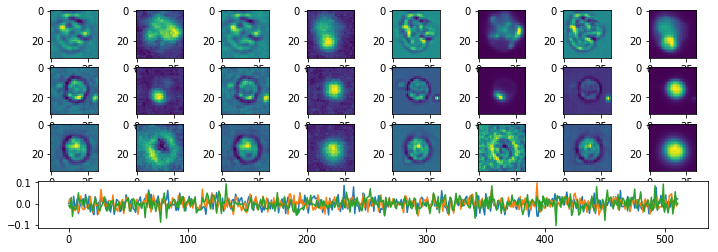

Epoch:  5 Iteration:  1000 Loss:  2.1977515 2.1977515 0.0


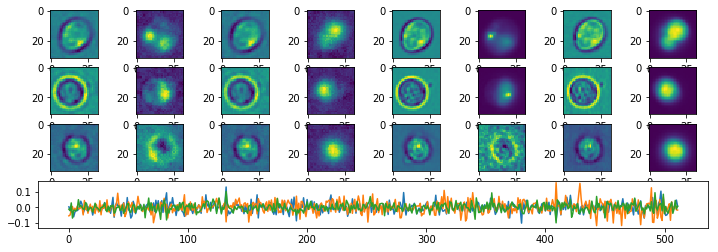

Epoch:  6 Iteration:  0 Loss:  1.9936848 1.9936848 0.0


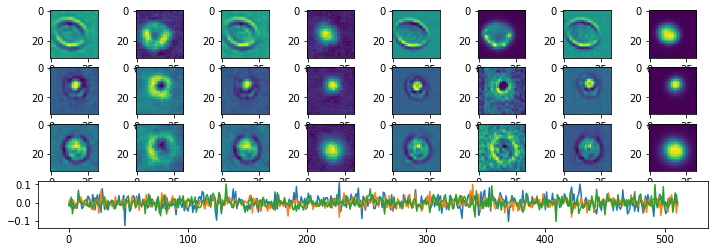

Epoch:  6 Iteration:  500 Loss:  2.0055578 2.0055578 0.0


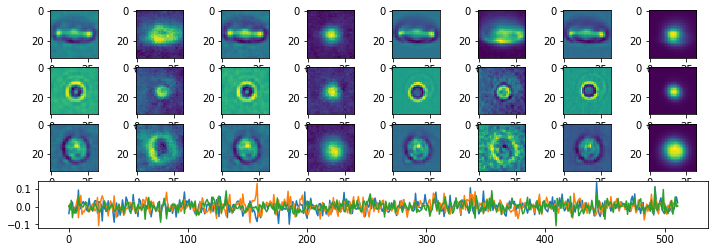

Epoch:  6 Iteration:  1000 Loss:  1.8877106 1.8877106 0.0


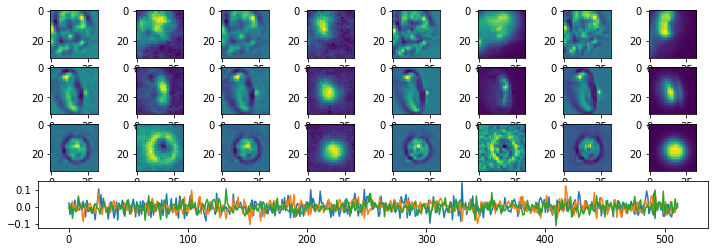

Epoch:  7 Iteration:  0 Loss:  1.726099 1.726099 0.0


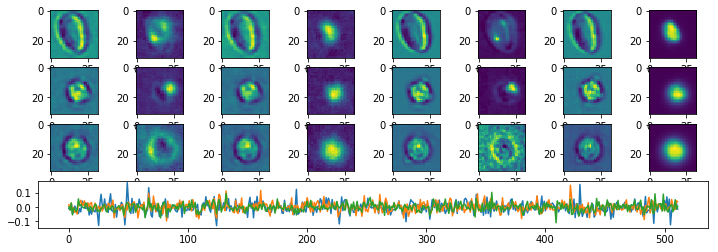

Epoch:  7 Iteration:  500 Loss:  1.7219135 1.7219135 0.0


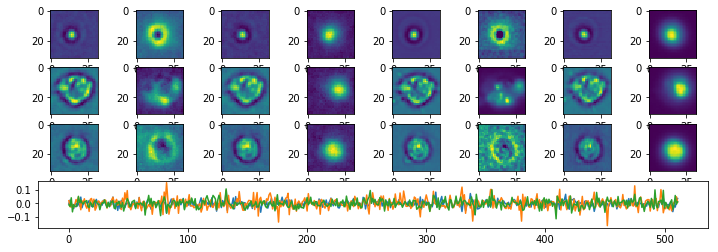

Epoch:  7 Iteration:  1000 Loss:  1.6315575 1.6315575 0.0


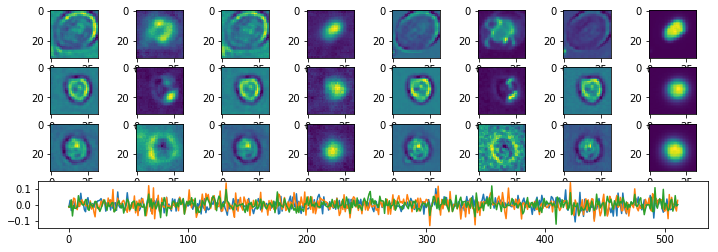

Epoch:  8 Iteration:  0 Loss:  1.5130119 1.5130119 0.0


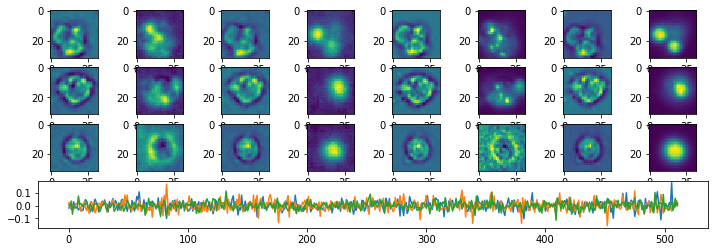

Epoch:  8 Iteration:  500 Loss:  1.5202699 1.5202699 0.0


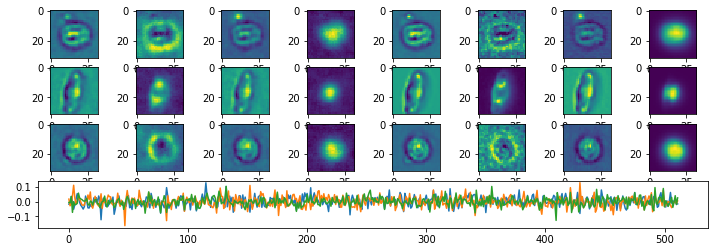

Epoch:  8 Iteration:  1000 Loss:  1.3917475 1.3917475 0.0


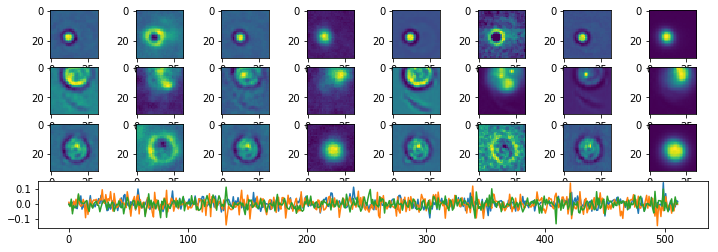

Epoch:  9 Iteration:  0 Loss:  1.3179151 1.3179151 0.0


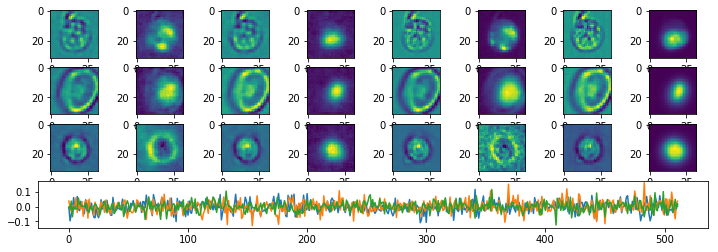

Epoch:  9 Iteration:  500 Loss:  1.3526044 1.3526044 0.0


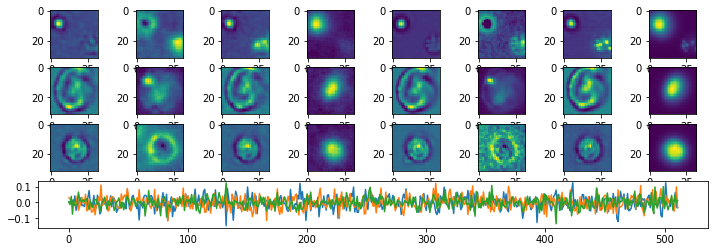

Epoch:  9 Iteration:  1000 Loss:  1.2243912 1.2243912 0.0


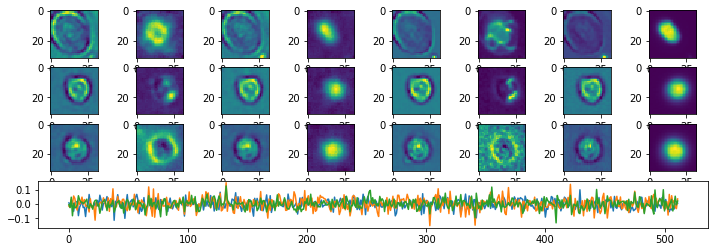

Epoch:  10 Iteration:  0 Loss:  1.1881785 1.1881785 0.0


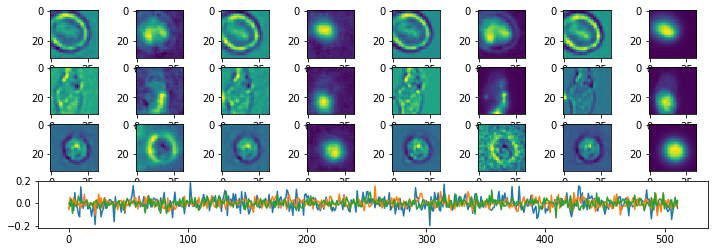

Epoch:  10 Iteration:  500 Loss:  1.22677 1.22677 0.0


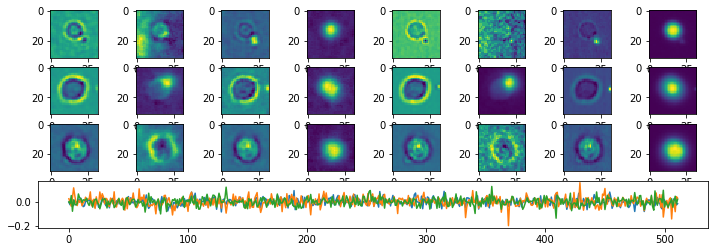

Epoch:  10 Iteration:  1000 Loss:  2.5388122 2.5388122 0.0


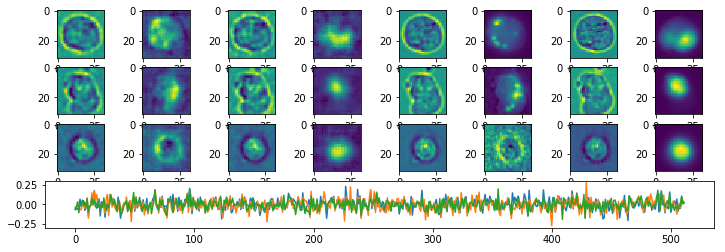

Epoch:  11 Iteration:  0 Loss:  1.4965752 1.4965752 0.0


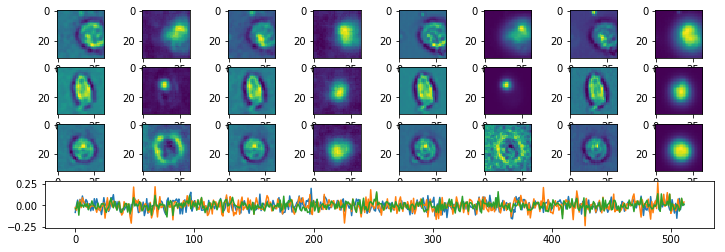

Epoch:  11 Iteration:  500 Loss:  1.3965728 1.3965728 0.0


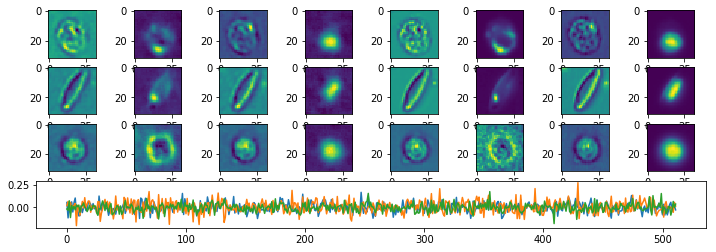

Epoch:  11 Iteration:  1000 Loss:  1.2594494 1.2594494 0.0


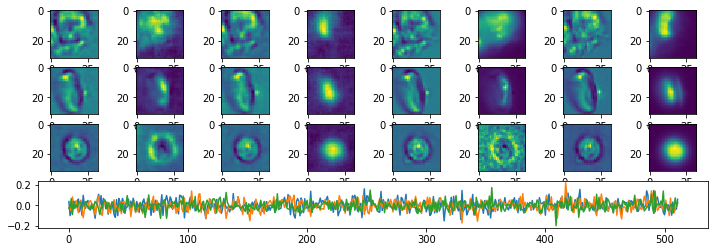

Epoch:  12 Iteration:  0 Loss:  1.2034087 1.2034087 0.0


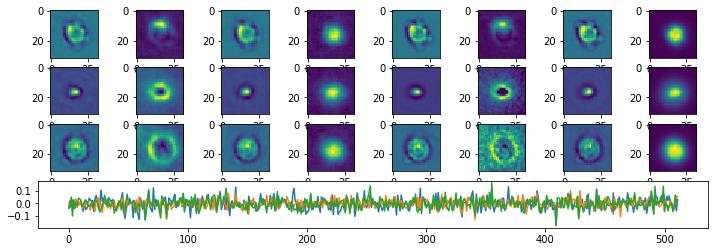

Epoch:  12 Iteration:  500 Loss:  1.2522177 1.2522177 0.0


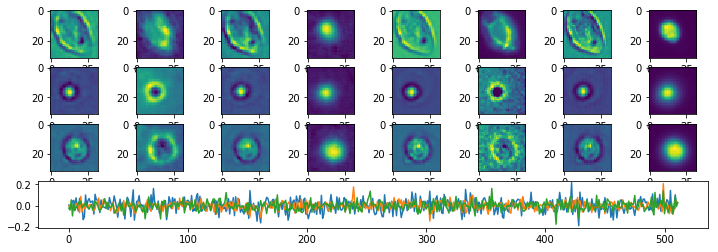

Epoch:  12 Iteration:  1000 Loss:  1.1657254 1.1657254 0.0


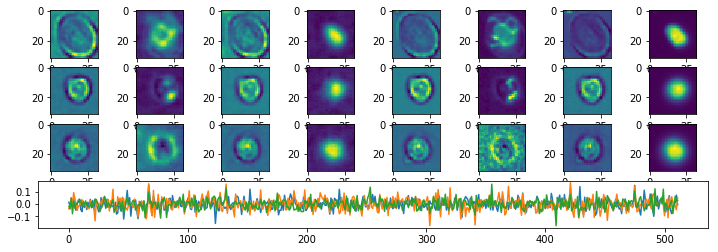

Epoch:  13 Iteration:  0 Loss:  1.1089385 1.1089385 0.0


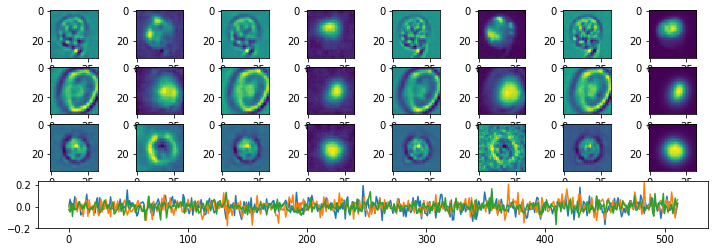

Epoch:  13 Iteration:  500 Loss:  1.1681738 1.1681738 0.0


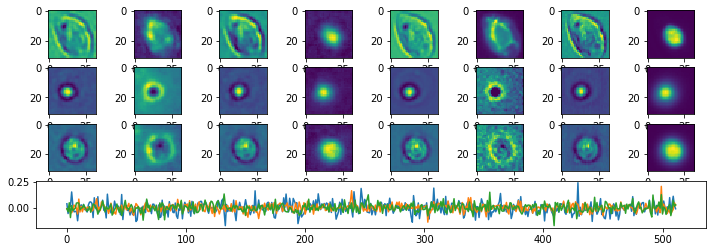

Epoch:  13 Iteration:  1000 Loss:  1.1149235 1.1149235 0.0


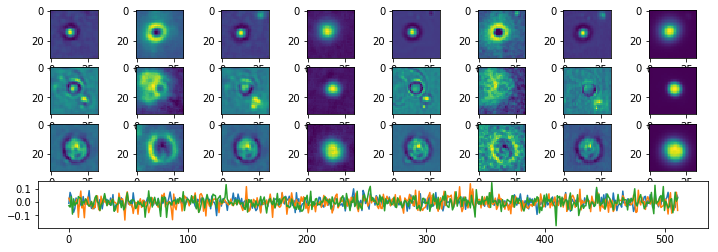

Epoch:  14 Iteration:  0 Loss:  1.0699565 1.0699565 0.0


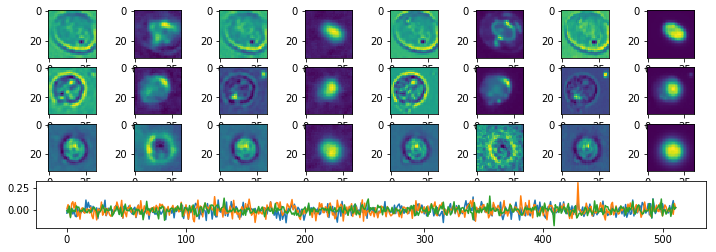

Epoch:  14 Iteration:  500 Loss:  1.1364799 1.1364799 0.0


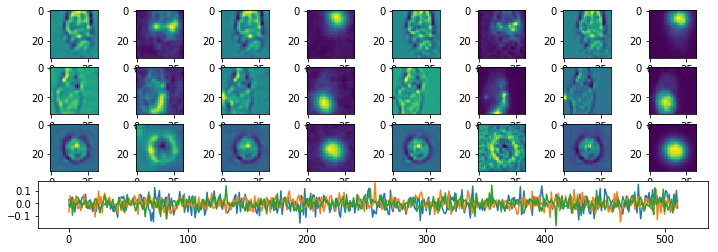

Epoch:  14 Iteration:  1000 Loss:  1.0756714 1.0756714 0.0


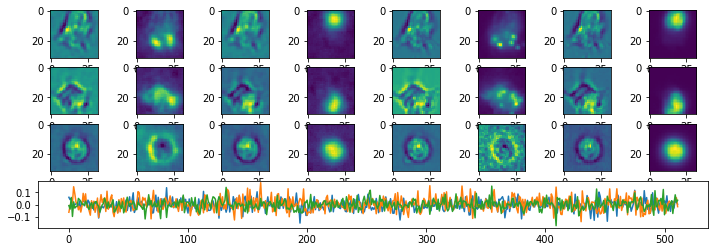

Epoch:  15 Iteration:  0 Loss:  1.0443642 1.0443642 0.0


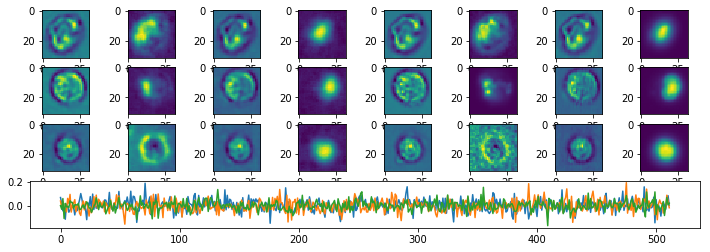

Epoch:  15 Iteration:  500 Loss:  1.0988859 1.0988859 0.0


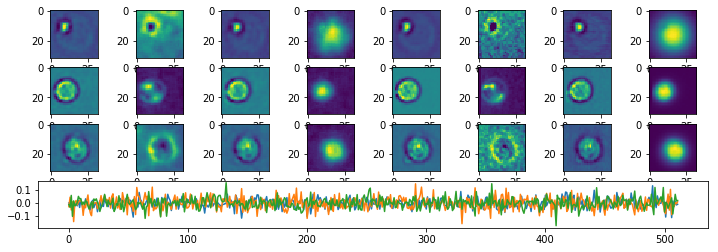

Epoch:  15 Iteration:  1000 Loss:  1.0118214 1.0118214 0.0


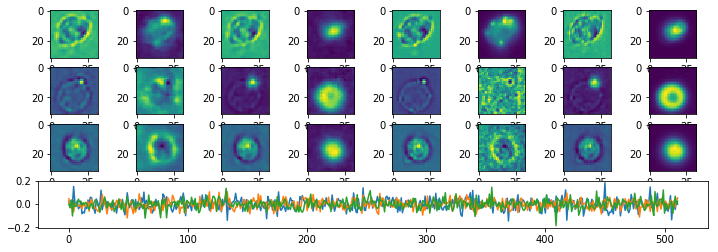

Epoch:  16 Iteration:  0 Loss:  0.97703874 0.97703874 0.0


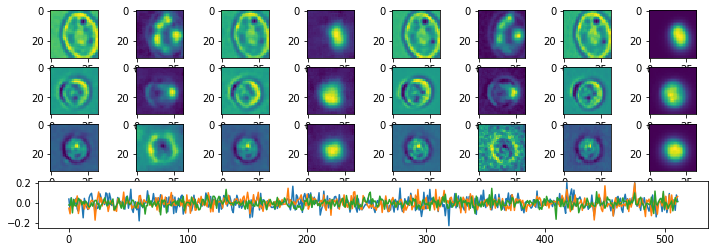

Epoch:  16 Iteration:  500 Loss:  1.0576731 1.0576731 0.0


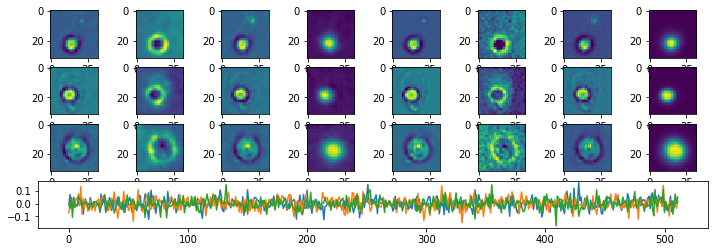

Epoch:  16 Iteration:  1000 Loss:  0.9827337 0.9827337 0.0


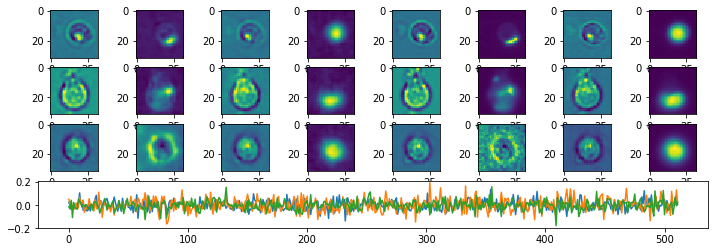

Epoch:  17 Iteration:  0 Loss:  0.94598925 0.94598925 0.0


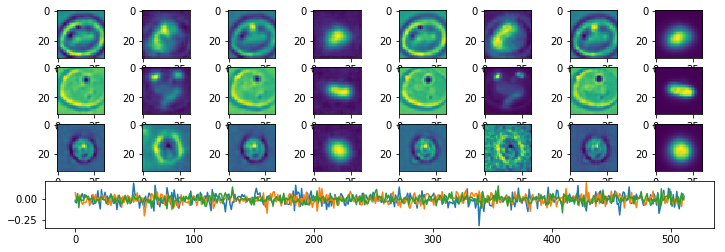

Epoch:  17 Iteration:  500 Loss:  0.9944917 0.9944917 0.0


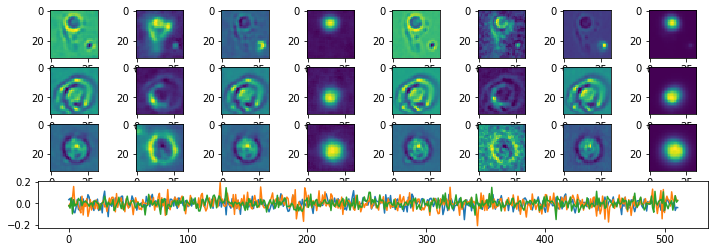

Epoch:  17 Iteration:  1000 Loss:  0.90844405 0.90844405 0.0


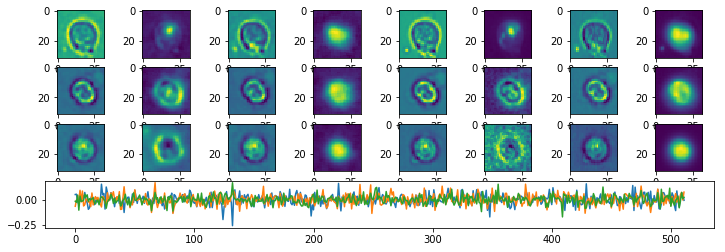

Done


In [8]:

p_mmdict = mmdict #{"Fish6_15_cjw_64.tif.mm": m3}
#             "plate04_all.mm": m4}

p_width = 32
p_height = 32
p_nchannels = 4
p_channels = [0,1,3,4]
p_nepochs = 18
p_batchsize = 128
p_learning_rate = 0.0001  #.00005
p_restore = False
p_latent_size = 512 #128 + 64
p_droprate = 0.95
p_stdev = .04

enc_sizes = [(128, 3), (256, 3), (512, 3)]  #128, 3)]
######enc_sizes = [(64, 3), (128, 3), (256,3), (512,3)] #, (64, 3), (128,3)] #, (32, 3), (64, 3)]
#enc_sizes = [(16, 5), (32, 3), (64,3), (128,3)] #, (64, 3), (128,3)] #, (32, 3), (64, 3)]
dec_sizes = list(reversed(enc_sizes))
#dec_sizes.append((p_nchannels,7))

params = dict()

params['width'] = p_width
params['height'] = p_height
params['nchannels'] = p_nchannels
params['channels'] = p_channels
params['nepochs'] = p_nepochs
params['batchsize'] = p_batchsize
params['learning_rate'] = p_learning_rate
params['restore'] = p_restore
params['latent_size'] = p_latent_size
params['droprate'] = p_droprate
params['stdev'] = p_stdev
params['denoise'] = None
params['slam'] = 0.0
params['enc_sizes'] = enc_sizes
params['dec_sizes'] = dec_sizes

cpdir = "/media/cjw/Data/cyto/Checkpoints/2018-06-04-512"

if not os.path.exists(cpdir):
    os.makedirs(cpdir)
autoencoder_train.train(p_mmdict, p_df, params, 500, cpdir)

In [7]:
x = 4
x

4